In [1]:
import pandas as pd

In [2]:
corpus = []
target = []
edad = []
sexo = []
severidad = []
archivo = open("dataset_elpino.csv", encoding="utf-8")
header = archivo.readline().strip().split(";")
features = []

for col in header:
    col = col.split("-")[0].strip()
    if col.startswith("Diag") or col.startswith("Proc"):
        col = col.split(" ")
        col = col[0] + col[1]
    features.append(col)

for linea in archivo:
    row = []
    linea = linea.strip().split(";")
    for i in range(len(linea)):
        col = linea[i].split("-")[0].strip()
        if i == 67:
            grd = col[:5]  
            target.append(grd)  
        elif i == 66:
            sexo.append(1 if col == "Mujer" else 0)
        elif i == 65:
            edad.append(int(col))
        else:
            row.append(col)
    corpus.append(row)

archivo.close()


In [3]:
corpus[0]

['A41.8',
 'B37.6',
 'I39.8',
 'N10',
 'B96.1',
 'L89.9',
 'L08.9',
 'B96.2',
 'A41.5',
 'J86.9',
 'U07.1',
 'Y95',
 'N18.5',
 'E87.1',
 'D64.9',
 'G82.2',
 'N31.9',
 'I10',
 'K70.4',
 'F19.2',
 'F10.2',
 'E46',
 'G40.9',
 'L21.9',
 'Z93.5',
 'Z93.3',
 'Z99.2',
 'Z91.6',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '86.28',
 '34.91',
 '88.38',
 '87.41',
 '88.75',
 '88.01',
 '88.43',
 '88.41',
 '87.44',
 '99.29',
 '99.19',
 '99.18',
 '99.21',
 '99.26',
 '99.23',
 '93.94',
 '89.52',
 '90.59',
 '89.65',
 '39.95',
 '39.95',
 '99.04',
 '90.39',
 '99.84',
 '88.72',
 '90.42',
 '90.52',
 '91.39',
 '91.33',
 '87.03']

In [4]:
features

['Diag01',
 'Diag02',
 'Diag03',
 'Diag04',
 'Diag05',
 'Diag06',
 'Diag07',
 'Diag08',
 'Diag09',
 'Diag10',
 'Diag11',
 'Diag12',
 'Diag13',
 'Diag14',
 'Diag15',
 'Diag16',
 'Diag17',
 'Diag18',
 'Diag19',
 'Diag20',
 'Diag21',
 'Diag22',
 'Diag23',
 'Diag24',
 'Diag25',
 'Diag26',
 'Diag27',
 'Diag28',
 'Diag29',
 'Diag30',
 'Diag31',
 'Diag32',
 'Diag33',
 'Diag34',
 'Diag35',
 'Proced01',
 'Proced02',
 'Proced03',
 'Proced04',
 'Proced05',
 'Proced06',
 'Proced07',
 'Proced08',
 'Proced09',
 'Proced10',
 'Proced11',
 'Proced12',
 'Proced13',
 'Proced14',
 'Proced15',
 'Proced16',
 'Proced17',
 'Proced18',
 'Proced19',
 'Proced20',
 'Proced21',
 'Proced22',
 'Proced23',
 'Proced24',
 'Proced25',
 'Proced26',
 'Proced27',
 'Proced28',
 'Proced29',
 'Proced30',
 'Edad en años',
 'Sexo (Desc)',
 'GRD']

In [5]:
df=pd.DataFrame(corpus,columns=features[:-3])
df["GRD"]=target

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diag01    14561 non-null  object
 1   Diag02    14561 non-null  object
 2   Diag03    14561 non-null  object
 3   Diag04    14561 non-null  object
 4   Diag05    14561 non-null  object
 5   Diag06    14561 non-null  object
 6   Diag07    14561 non-null  object
 7   Diag08    14561 non-null  object
 8   Diag09    14561 non-null  object
 9   Diag10    14561 non-null  object
 10  Diag11    14561 non-null  object
 11  Diag12    14561 non-null  object
 12  Diag13    14561 non-null  object
 13  Diag14    14561 non-null  object
 14  Diag15    14561 non-null  object
 15  Diag16    14561 non-null  object
 16  Diag17    14561 non-null  object
 17  Diag18    14561 non-null  object
 18  Diag19    14561 non-null  object
 19  Diag20    14561 non-null  object
 20  Diag21    14561 non-null  object
 21  Diag22    14

In [7]:
df["GRD"].value_counts()[:20]

GRD
14610    1220
14612     927
14613     741
07114     501
13416     458
15817     433
11412     357
04415     341
06120     332
06113     326
04416     319
13120     309
05412     298
13111     288
06418     262
04102     254
04421     234
01414     216
04418     209
06417     202
Name: count, dtype: int64

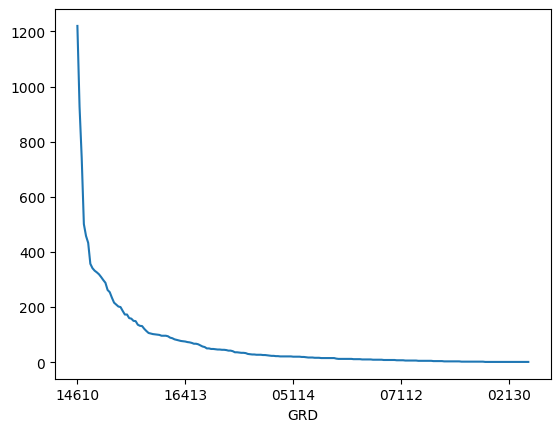

In [8]:
df["GRD"].value_counts().plot();

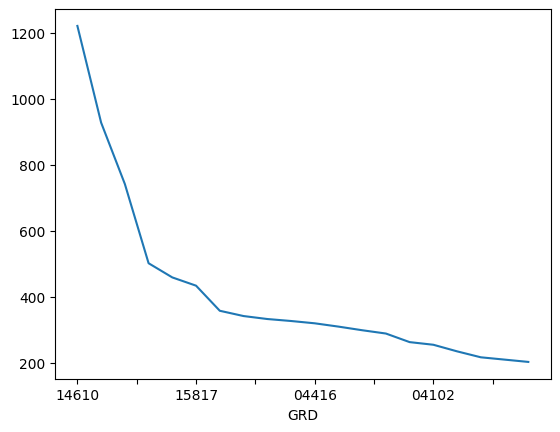

In [9]:
df["GRD"].value_counts()[:20].plot();

In [10]:
df["GRD"] = df["GRD"].astype(str).str.slice(0, 5)

# Ahora puedes verificar los resultados
print(df["GRD"].value_counts()[:20])

GRD
14610    1220
14612     927
14613     741
07114     501
13416     458
15817     433
11412     357
04415     341
06120     332
06113     326
04416     319
13120     309
05412     298
13111     288
06418     262
04102     254
04421     234
01414     216
04418     209
06417     202
Name: count, dtype: int64


In [11]:
 # Contar las ocurrencias de cada valor en la columna "GRD"
counts = df["GRD"].value_counts()

grd_to_keep = counts[counts > 320].index

# Filtrar el DataFrame para mantener solo las filas con los GRD que se repiten 10 veces o más
df_filtered = df[df["GRD"].isin(grd_to_keep)]  

In [12]:
data=df_filtered

In [13]:
features_procedimientos=[]
features_diagnosticos=[]
for j in range(1,36):
    field="Diag"+str(j).zfill(2)
    features_diagnosticos.append(field)
for j in range(1,31):
    field="Proced"+str(j).zfill(2)
    features_procedimientos.append(field)

In [14]:
procedimientos={}
diagnosticos={}
for i, row in data.iterrows():
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        if row[field] not in diagnosticos:
            diagnosticos[row[field]]=1
        else:
            diagnosticos[row[field]]+=1
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        if row[field] not in procedimientos:
            procedimientos[row[field]]=1
        else:
            procedimientos[row[field]]+=1
token_diagnosticos=list(diagnosticos.keys())
token_procedimientos=list(procedimientos.keys())
vocabulario=len(token_diagnosticos)+len(token_procedimientos)+1
print("Diagnósticos: ",len(token_diagnosticos))
print("Procedimientos: ",len(token_procedimientos))
print("Vocabulario: ",vocabulario)

Diagnósticos:  1553
Procedimientos:  426
Vocabulario:  1980


In [15]:
token_rows=[]
for i, row in data.iterrows():
    token_row=[]
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        token_row.append(1+token_diagnosticos.index(row[field]))
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        token_row.append(1+1553+token_procedimientos.index(row[field]))
    token_rows.append(token_row)

In [16]:
import tensorflow as tf
from keras.layers import Attention, Input, Dense, Embedding, Flatten, LSTM
from keras.models import Model,Sequential
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from keras.utils import pad_sequences

X=pad_sequences(token_rows)

In [17]:
X.shape

(5636, 65)

In [18]:
Y=data["GRD"].apply(lambda x: int(x)).to_numpy()
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)
Y=np.asarray(Y)
Y=Y.reshape(-1,1)
encoder=OneHotEncoder()
encoder.fit(Y)
Y=encoder.transform(Y).todense()
print(Y.shape)

(5636, 10)


In [19]:
X = np.array(token_rows)  # Asegúrate de que token_rows contenga los datos correctos

x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=0)


In [20]:
print(x_train.shape, x_val.shape)  # Verifica las formas de los conjuntos de datos


(4227, 65) (1409, 65)


In [21]:
modelo_emb=Sequential()
modelo_emb.add(Embedding(input_dim=vocabulario,output_dim=64))
modelo_emb.add(LSTM(32))
modelo_emb.add(Dense(10,activation="softmax"))
modelo_emb.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["acc"])
modelo_emb.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
tag = "emb" + datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_acc", patience=4, restore_best_weights=True)

spam_emb = modelo_emb.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=32, verbose=2,
                          callbacks=[tensorboard_callback, earlystopping_callback])

Epoch 1/32
133/133 - 5s - 34ms/step - acc: 0.2617 - loss: 1.8609 - val_acc: 0.3123 - val_loss: 1.6034
Epoch 2/32
133/133 - 2s - 14ms/step - acc: 0.3627 - loss: 1.5149 - val_acc: 0.4166 - val_loss: 1.3658
Epoch 3/32
133/133 - 2s - 14ms/step - acc: 0.4190 - loss: 1.4257 - val_acc: 0.3953 - val_loss: 1.4537
Epoch 4/32
133/133 - 2s - 15ms/step - acc: 0.4616 - loss: 1.3454 - val_acc: 0.6089 - val_loss: 1.0649
Epoch 5/32
133/133 - 2s - 14ms/step - acc: 0.6347 - loss: 1.0112 - val_acc: 0.6664 - val_loss: 0.9202
Epoch 6/32
133/133 - 2s - 14ms/step - acc: 0.6683 - loss: 0.8618 - val_acc: 0.6721 - val_loss: 0.8909
Epoch 7/32
133/133 - 2s - 14ms/step - acc: 0.6778 - loss: 0.8046 - val_acc: 0.6757 - val_loss: 0.7981
Epoch 8/32
133/133 - 2s - 14ms/step - acc: 0.6969 - loss: 0.7490 - val_acc: 0.6977 - val_loss: 0.7369
Epoch 9/32
133/133 - 2s - 14ms/step - acc: 0.7064 - loss: 0.7360 - val_acc: 0.7225 - val_loss: 0.7299
Epoch 10/32
133/133 - 2s - 14ms/step - acc: 0.7582 - loss: 0.6579 - val_acc: 0.758

In [23]:
modelo_emb.save('modelo{0}.keras'.format(tag))

In [24]:
modelo_emb=tf.keras.models.load_model("modeloemb20250126-185923.keras")

In [25]:
y_pred_probs=modelo_emb.predict(x_val)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

In [27]:
y_pred=np.argmax(y_pred_probs,axis=1)

In [28]:
y_pred

array([8, 3, 7, ..., 4, 0, 6])

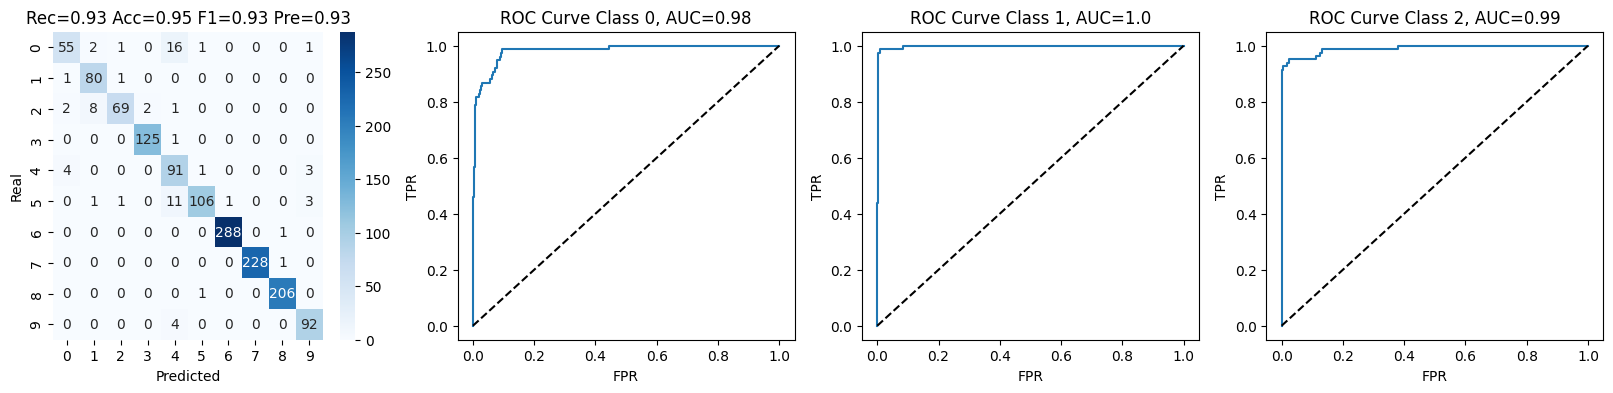

In [29]:
fig, axes = plt.subplots(1,4)
fig.set_size_inches(20, 4)

y_val1d=np.squeeze(np.asarray(np.argmax(y_val,axis=1)))

matriz = confusion_matrix(y_val1d, 
                          y_pred)    
ax=axes[0]
sns.heatmap(matriz, annot=True, ax = ax, cmap="Blues",fmt="d");
ax.set_title("Rec="+str(round(recall_score(y_val1d,y_pred,average="macro"),2))+
        " Acc="+str(round(accuracy_score(y_val1d,y_pred),2))+
        " F1="+str(round(f1_score(y_val1d, y_pred,average="macro"),2))+
        " Pre="+str(round(precision_score(y_val1d, y_pred,average="macro"),2)));
axes[0].set_xlabel('Predicted');
axes[0].set_ylabel('Real');

fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.asarray(y_val[:, i]), np.asarray(y_pred_probs[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    axes[i+1].plot(fpr[i], tpr[i])
    axes[i+1].plot([0, 1], [0, 1], 'k--')
    axes[i+1].set_xlabel('FPR')
    axes[i+1].set_ylabel('TPR')
    axes[i+1].set_title('ROC Curve Class {0}, AUC={1}'.format(i,round(roc_auc[i],2)))

In [30]:
y_pred1d=label_binarize(np.argmax(y_pred_probs,axis=1),classes=[0,1,2])

In [31]:
for i in range(3):
    print("ACC=",round(accuracy_score(np.squeeze(np.asarray(y_val[:,i])), y_pred1d[:,i]),2),
        "PRE=",round(precision_score(np.squeeze(np.asarray(y_val[:,i])), y_pred1d[:,i]),2),
        "REC=",round(recall_score(np.squeeze(np.asarray(y_val[:,i])), y_pred1d[:,i]),2))

ACC= 0.98 PRE= 0.89 REC= 0.72
ACC= 0.99 PRE= 0.88 REC= 0.98
ACC= 0.99 PRE= 0.96 REC= 0.84


In [32]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_val1d,y_pred,labels=[0,1,2])

array([[[1326,    7],
        [  21,   55]],

       [[1316,   11],
        [   2,   80]],

       [[1324,    3],
        [  13,   69]]])

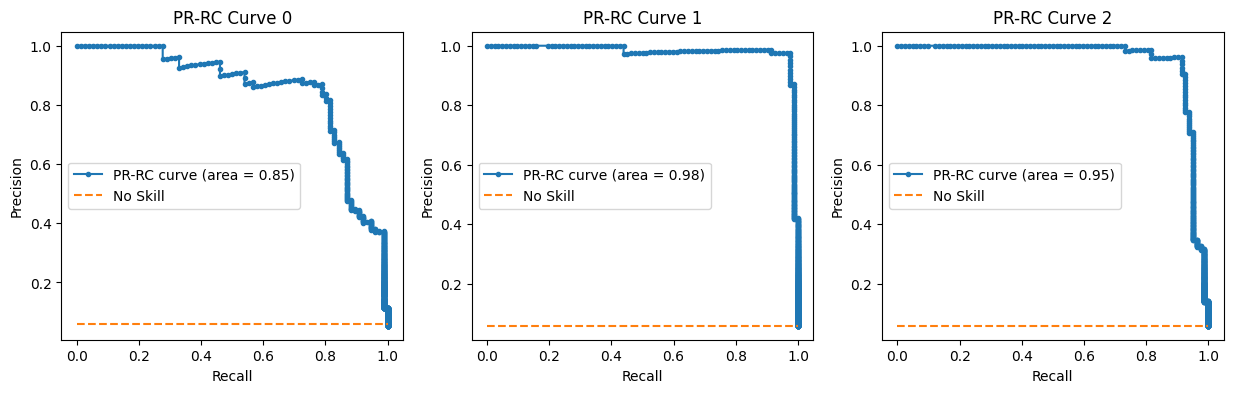

In [33]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 4)

for i in range(3):
    lr_precision, lr_recall, thresholds_pr = precision_recall_curve(np.asarray(y_val[:,i]), np.asarray(y_pred_probs[:,i]))
    filtro=np.squeeze(np.asarray(y_val[:,1]==1))
    no_skill = len(y_val[filtro]) / len(y_val)
    p=i
    axes[p].plot(lr_recall, lr_precision, marker='.', label='PR-RC curve (area = %0.2f)' % auc(lr_recall,lr_precision))
    axes[p].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    axes[p].set_xlabel('Recall')
    axes[p].set_ylabel('Precision')
    axes[p].set_title('PR-RC Curve %i' % i)
    axes[p].legend();

In [34]:
test=pd.DataFrame(x_val,columns=features_diagnosticos+features_procedimientos)
test["y"]=np.argmax(y_val,axis=1)
test["yp"]=np.argmax(y_pred_probs,axis=1)

In [35]:
test[(test["y"]==1) & (test["yp"]==2)]

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced23,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,y,yp
922,213,51,22,22,22,22,22,22,22,22,...,1579,1579,1579,1579,1579,1579,1579,1579,1,2


In [36]:
import shap


C:\Users\fliza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
explainer = shap.KernelExplainer(modelo_emb.predict, x_val[:34])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [38]:
shap_values = explainer.shap_values(x_val[:34])

  0%|          | 0/34 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


  3%|▎         | 1/34 [00:08<04:49,  8.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


  6%|▌         | 2/34 [00:17<04:35,  8.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


  9%|▉         | 3/34 [00:25<04:26,  8.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


 12%|█▏        | 4/34 [00:34<04:17,  8.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


 15%|█▍        | 5/34 [00:42<04:08,  8.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 18%|█▊        | 6/34 [00:51<04:00,  8.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


 21%|██        | 7/34 [01:00<03:51,  8.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 24%|██▎       | 8/34 [01:09<03:45,  8.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 26%|██▋       | 9/34 [01:18<03:40,  8.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 29%|██▉       | 10/34 [01:27<03:34,  8.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 32%|███▏      | 11/34 [01:36<03:27,  9.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 35%|███▌      | 12/34 [01:45<03:19,  9.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 38%|███▊      | 13/34 [01:55<03:11,  9.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 41%|████      | 14/34 [02:04<03:03,  9.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 44%|████▍     | 15/34 [02:13<02:54,  9.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 47%|████▋     | 16/34 [02:22<02:44,  9.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 50%|█████     | 17/34 [02:31<02:33,  9.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 53%|█████▎    | 18/34 [02:40<02:25,  9.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 56%|█████▌    | 19/34 [02:49<02:16,  9.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 59%|█████▉    | 20/34 [02:59<02:08,  9.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 62%|██████▏   | 21/34 [03:08<02:00,  9.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 65%|██████▍   | 22/34 [03:17<01:51,  9.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 68%|██████▊   | 23/34 [03:27<01:41,  9.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 71%|███████   | 24/34 [03:35<01:31,  9.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 74%|███████▎  | 25/34 [03:44<01:21,  9.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


 76%|███████▋  | 26/34 [03:53<01:12,  9.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 79%|███████▉  | 27/34 [04:02<01:03,  9.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 82%|████████▏ | 28/34 [04:11<00:53,  8.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 85%|████████▌ | 29/34 [04:20<00:45,  9.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 88%|████████▊ | 30/34 [04:29<00:35,  8.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 91%|█████████ | 31/34 [04:38<00:26,  8.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 94%|█████████▍| 32/34 [04:47<00:17,  8.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


 97%|█████████▋| 33/34 [04:56<00:08,  8.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2278/2278 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


100%|██████████| 34/34 [05:05<00:00,  8.98s/it]


In [39]:
shap_values.shape

(34, 65, 10)

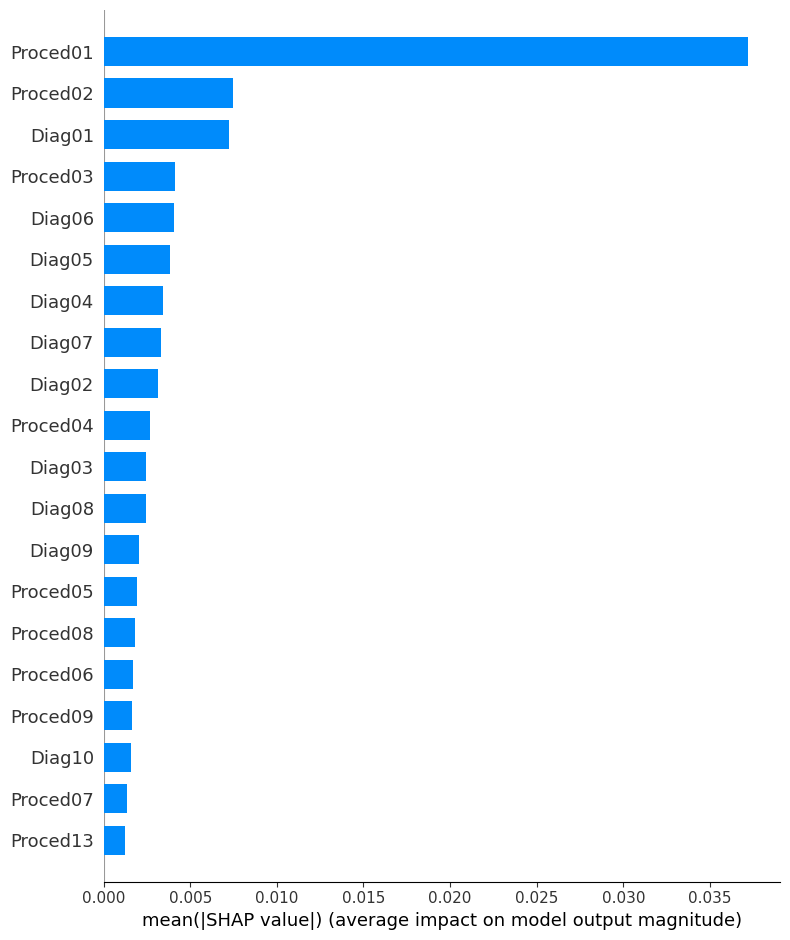

In [40]:
shap.summary_plot(shap_values[:,:,1], plot_type = 'bar',feature_names=features_diagnosticos+features_procedimientos)

In [41]:
test[(test["y"]==1) & (test["yp"]==2)][["Diag01","Diag02","Diag03","Diag04","Diag05","Diag06"]]

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06
922,213,51,22,22,22,22


In [42]:
filtro1=test[(test["y"]==1)]

In [43]:
y_pred_probs[33]

array([7.7961558e-06, 2.9807503e-05, 1.2235862e-06, 9.4674397e-05,
       2.2774921e-05, 2.9178988e-03, 9.9263543e-01, 1.9328389e-04,
       2.9806523e-03, 1.1166018e-03], dtype=float32)

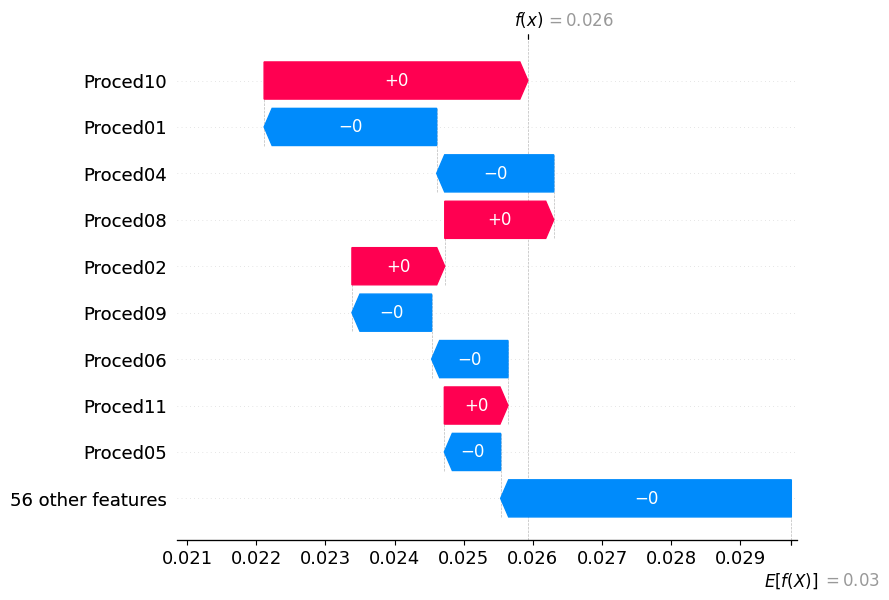

In [44]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[33,:,2], feature_names = features_diagnosticos+features_procedimientos)

In [45]:
token_diagnosticos[50]

'E66.9'

In [46]:
filtro1["Diag01"].value_counts()

Diag01
213    58
171    13
326     9
331     2
Name: count, dtype: int64

In [47]:
data.query("Diag01=='E66.9'")["GRD"].value_counts()

GRD
06120    42
07114     1
Name: count, dtype: int64